# Google Time Series Analysis and Forecasting

## import relevant packages

In [1]:
# stop printing warnings
import warnings; warnings.simplefilter('ignore')

# data structures and data analysis tools
import pandas as pd

# scientific computing
import numpy as np
from numpy import log

# operating system
import os

# visualisation
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import seaborn as sns
color = sns.color_palette()

# default matplotlib plotting style
plt.style.use('ggplot')

# time series forecasting
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# read in data from sources such as Google, World Bank
import pandas_datareader as pdr

# get data from Google Finance
import quandl

# dates
import datetime

In [2]:
# set options
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_row', 200)

# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read File

In [3]:
# get the current working directory
os.getcwd()

'/Users/manuelsteiner/Documents/Time_Series/Script'

In [55]:
# import data from Google finance
google = quandl.get("WIKI/GOOGL", 
                  start_date = "2015-01-01", 
                  end_date = "2019-05-01")

In [56]:
# first 5 rows
aapl.head()

# last 5 rows
aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [57]:
# in case the API has changed, save to csv and read it again
google.to_csv('/Users/manuelsteiner/Documents/Time_Series/Data/google.csv')

# read as df
google = pd.read_csv('/Users/manuelsteiner/Documents/Time_Series/Data/google.csv', 
                     header = 0, 
                     index_col = 'Date', 
                     parse_dates = True)


## Descriptive Statistics

In [58]:
# index
google.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [59]:
# columns
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [60]:
# descriptive statistics
google.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,813.000000,813.000000,813.000000,813.000000,8.130000e+02,813.0,813.0,813.000000,813.000000,813.000000,813.000000,8.130000e+02
mean,798.454314,804.569032,791.551047,798.267678,1.922026e+06,0.0,1.0,798.454314,804.569032,791.551047,798.267678,1.922026e+06
std,167.923467,168.859096,166.692158,167.848670,9.946624e+05,0.0,0.0,167.923467,168.859096,166.692158,167.848670,9.946624e+05
min,499.240000,500.280000,490.910000,497.060000,5.211410e+05,0.0,1.0,499.240000,500.280000,490.910000,497.060000,5.211410e+05
25%,694.000000,703.000000,685.320000,695.190000,1.347750e+06,0.0,1.0,694.000000,703.000000,685.320000,695.190000,1.347750e+06
50%,786.280000,791.430000,777.320000,782.240000,1.673820e+06,0.0,1.0,786.280000,791.430000,777.320000,782.240000,1.673820e+06
75%,940.090000,944.999500,933.920000,940.130000,2.157409e+06,0.0,1.0,940.090000,944.999500,933.920000,940.130000,2.157409e+06
max,1188.000000,1198.000000,1184.060000,1187.560000,1.285814e+07,0.0,1.0,1188.000000,1198.000000,1184.060000,1187.560000,1.285814e+07


In [61]:
# extract a specific period
print(google.loc[pd.Timestamp('2015-01-01'):pd.Timestamp('2015-12-31')].head())

              Open      High     Low   Close     Volume  Ex-Dividend  \
Date                                                                   
2015-01-02  532.60  535.8000  527.88  529.55  1327870.0          0.0   
2015-01-05  527.15  527.9899  517.75  519.46  2059119.0          0.0   
2015-01-06  520.50  521.2100  505.55  506.64  2731813.0          0.0   
2015-01-07  510.95  511.4900  503.65  505.15  2345875.0          0.0   
2015-01-08  501.51  507.5000  495.02  506.91  3662224.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2015-01-02          1.0     532.60   535.8000    527.88      529.55   
2015-01-05          1.0     527.15   527.9899    517.75      519.46   
2015-01-06          1.0     520.50   521.2100    505.55      506.64   
2015-01-07          1.0     510.95   511.4900    503.65      505.15   
2015-01-08          1.0     501.51   507.5000    495.02      506.91  

In [62]:
# resample at the monthly level
monthly_google = google.resample('M').mean()
print(monthly_google)

                   Open         High          Low        Close        Volume  \
Date                                                                           
2015-01-31   516.480000   521.515045   510.174600   515.919250  2.642176e+06   
2015-02-28   539.176842   544.848468   535.208553   540.985526  2.127386e+06   
2015-03-31   566.354773   570.566268   561.694545   565.966136  1.963970e+06   
2015-04-30   549.896667   554.367786   544.975524   549.482619  2.083169e+06   
2015-05-31   548.042500   551.744320   543.734365   547.676750  1.621088e+06   
2015-06-30   551.204091   554.416364   547.513636   550.796818  1.600826e+06   
2015-07-31   615.796364   623.942209   610.504318   617.465000  3.115626e+06   
2015-08-31   670.324643   677.856271   659.685086   667.657143  2.635464e+06   
2015-09-30   648.912857   654.896038   641.408971   647.732857  2.069434e+06   
2015-10-31   690.520455   697.753264   682.755014   691.555455  2.286084e+06   
2015-11-30   758.724500   764.724350   7

##  Visualising Time Series Data

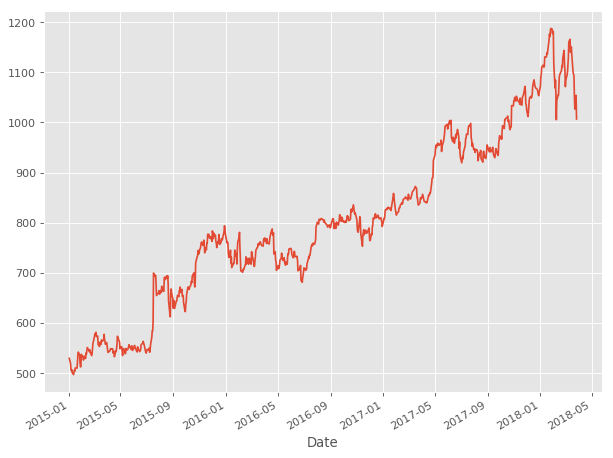

In [63]:
# plot the closing price
google['Close'].plot(grid= True)

# show the plot
plt.show()

## Returns

### Daily returns

In [64]:
# assign `Adj Close` to `daily_close`
daily_close = google[['Adj. Close']]

# daily returns
daily_pct_change = daily_close.pct_change()

# replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# inspect daily returns
print(daily_pct_change) 

            Adj. Close
Date                  
2015-01-02    0.000000
2015-01-05   -0.019054
2015-01-06   -0.024679
2015-01-07   -0.002941
2015-01-08    0.003484
2015-01-09   -0.012211
2015-01-12   -0.007309
2015-01-13    0.009536
2015-01-14    0.008230
2015-01-15   -0.003795
2015-01-16    0.012787
2015-01-20   -0.001009
2015-01-21    0.020493
2015-01-22    0.032495
2015-01-23    0.008654
2015-01-26   -0.009650
2015-01-27   -0.028935
2015-01-28   -0.016808
2015-01-29    0.001561
2015-01-30    0.047386
2015-02-02   -0.009953
2015-02-03    0.002067
2015-02-04   -0.013501
2015-02-05    0.007090
2015-02-06    0.007635
2015-02-09   -0.008607
2015-02-10    0.020556
2015-02-11   -0.003999
2015-02-12    0.014888
2015-02-13    0.009432
2015-02-17   -0.011158
2015-02-18   -0.004330
2015-02-19    0.007003
2015-02-20   -0.008509
2015-02-23   -0.012551
2015-02-24    0.006822
2015-02-25    0.016114
2015-02-26    0.021852
2015-02-27    0.005972
2015-03-02    0.022022
2015-03-03    0.006565
2015-03-04 

### Monthly returns

In [65]:
# resample `aapl` to business months, take last observation as value 
monthly = google.resample('BM').apply(lambda x: x[-1])

# calculate the monthly percentage change
monthly.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-27,0.075434,0.048463,0.074974,0.046656,-0.435806,NaN,0.0,0.075434,0.048463,0.074974,0.046656,-0.435806
2015-03-31,-0.000376,-0.012241,-0.004237,-0.014095,-0.488760,NaN,0.0,-0.000376,-0.012241,-0.004237,-0.014095,-0.488760
2015-04-30,0.001111,-0.002382,-0.014333,-0.010690,0.352338,NaN,0.0,0.001111,-0.002382,-0.014333,-0.010690,0.352338
2015-05-29,-0.009596,-0.012778,-0.003073,-0.006287,-0.080330,NaN,0.0,-0.009596,-0.012778,-0.003073,-0.006287,-0.080330
2015-06-30,-0.014660,-0.014514,-0.010091,-0.009682,-0.205691,NaN,0.0,-0.014660,-0.014514,-0.010091,-0.009682,-0.205691
2015-07-31,0.219432,0.218172,0.218075,0.217502,0.011956,NaN,0.0,0.219432,0.218172,0.218075,0.217502,0.011956
2015-08-31,-0.012697,-0.000887,-0.016509,-0.014722,0.114971,NaN,0.0,-0.012697,-0.000887,-0.016509,-0.014722,0.114971
2015-09-30,-0.037226,-0.037778,-0.026611,-0.016393,0.309780,NaN,0.0,-0.037226,-0.037778,-0.026611,-0.016393,0.309780


### Quarterly returns

In [66]:
# resample `aapl` to quarters, take the mean as value per quarter
quarter = google.resample("4M").mean()

# calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,0.067565,0.065872,0.071977,0.068957,-0.262452,NaN,0.0,0.067565,0.065872,0.071977,0.068957,-0.262452
2015-09-30,0.125682,0.127750,0.122603,0.124320,0.208686,NaN,0.0,0.125682,0.127750,0.122603,0.124320,0.208686
2016-01-31,0.190965,0.190733,0.190419,0.192395,-0.061283,NaN,0.0,0.190965,0.190733,0.190419,0.192395,-0.061283
2016-05-31,0.000167,-0.000859,0.001449,-0.000687,0.028286,NaN,0.0,0.000167,-0.000859,0.001449,-0.000687,0.028286
2016-09-30,0.035583,0.032735,0.039994,0.036992,-0.309154,NaN,0.0,0.035583,0.032735,0.039994,0.036992,-0.309154
2017-01-31,0.055670,0.055988,0.052568,0.053333,0.188491,NaN,0.0,0.055670,0.055988,0.052568,0.053333,0.188491
2017-05-31,0.087845,0.086954,0.092053,0.090675,-0.199971,NaN,0.0,0.087845,0.086954,0.092053,0.090675,-0.199971
2017-09-30,0.086496,0.087413,0.083057,0.084942,0.137385,NaN,0.0,0.086496,0.087413,0.083057,0.084942,0.137385


### Daily log returns

In [67]:
# daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2015-01-02         NaN
2015-01-05   -0.019238
2015-01-06   -0.024989
2015-01-07   -0.002945
2015-01-08    0.003478
2015-01-09   -0.012286
2015-01-12   -0.007336
2015-01-13    0.009491
2015-01-14    0.008197
2015-01-15   -0.003802
2015-01-16    0.012706
2015-01-20   -0.001009
2015-01-21    0.020285
2015-01-22    0.031978
2015-01-23    0.008617
2015-01-26   -0.009697
2015-01-27   -0.029362
2015-01-28   -0.016951
2015-01-29    0.001560
2015-01-30    0.046298
2015-02-02   -0.010002
2015-02-03    0.002065
2015-02-04   -0.013593
2015-02-05    0.007065
2015-02-06    0.007606
2015-02-09   -0.008644
2015-02-10    0.020348
2015-02-11   -0.004007
2015-02-12    0.014779
2015-02-13    0.009388
2015-02-17   -0.011221
2015-02-18   -0.004340
2015-02-19    0.006978
2015-02-20   -0.008546
2015-02-23   -0.012630
2015-02-24    0.006799
2015-02-25    0.015986
2015-02-26    0.021616
2015-02-27    0.005954
2015-03-02    0.021783
2015-03-03    0.006544
2015-03-04 

### Histogram of Daily Returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22683f28>]],
      dtype=object)

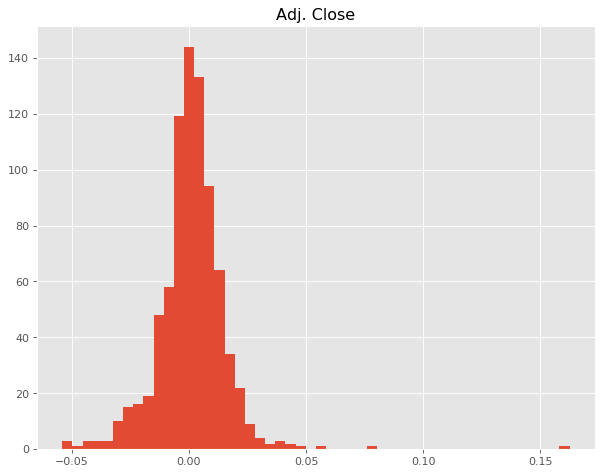

       Adj. Close
count  813.000000
mean     0.000893
std      0.014414
min     -0.054141
25%     -0.005371
50%      0.001251
75%      0.007732
max      0.162584


In [68]:
# plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# show the plot
plt.show()

# pull up summary statistics
print(daily_pct_change.describe())

### Cumulative Daily Returns

In [69]:
# calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# print `cum_daily_return`
print(cum_daily_return)

            Adj. Close
Date                  
2015-01-02    1.000000
2015-01-05    0.980946
2015-01-06    0.956737
2015-01-07    0.953923
2015-01-08    0.957247
2015-01-09    0.945558
2015-01-12    0.938646
2015-01-13    0.947597
2015-01-14    0.955396
2015-01-15    0.951770
2015-01-16    0.963941
2015-01-20    0.962969
2015-01-21    0.982702
2015-01-22    1.014635
2015-01-23    1.023416
2015-01-26    1.013540
2015-01-27    0.984213
2015-01-28    0.967671
2015-01-29    0.969181
2015-01-30    1.015107
2015-02-02    1.005004
2015-02-03    1.007081
2015-02-04    0.993485
2015-02-05    1.000529
2015-02-06    1.008167
2015-02-09    0.999490
2015-02-10    1.020036
2015-02-11    1.015957
2015-02-12    1.031083
2015-02-13    1.040808
2015-02-17    1.029195
2015-02-18    1.024738
2015-02-19    1.031914
2015-02-20    1.023133
2015-02-23    1.010292
2015-02-24    1.017184
2015-02-25    1.033576
2015-02-26    1.056161
2015-02-27    1.062468
2015-03-02    1.085865
2015-03-03    1.092994
2015-03-04 

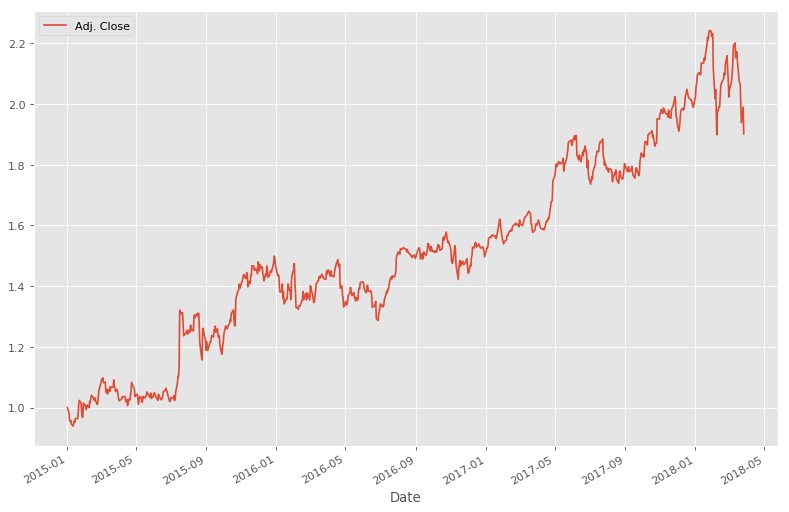

In [70]:
# plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# show the plot
plt.show()

## Univariate Time Series Forecasting

### ARIMA(p, d, q) Model

A widely used model to forecast time series is ARIMA(p, d, q) model. In this model, 
* ***p*** is the number of lags to be used as predictors.
* ***d*** is the differencing order
* ***q*** is the order of the "moving average" term.

This model needs the time series to be stationary in order to be able to produce forecasts. The main reason of non-stationarity is the series being a **Random Walk (RW)**.

A Random Walk can be with or without drift and is defined as follows:

Today's Price = mean + Yesterday's Price + Noise

$$P_t= μ + P_{t-1} + ε_t$$

In a Random Walk, the change in price is white noise.

The **Augmented Dickey-Fuller (ADF)** test assesses whether the series is a random walk or not:

$$P_t - P_{t-1}= α + β*P_{t-1} + ε_t$$

$H0: β = 0$ (random walk)

$H1: β <0$ (not random walk) 

If p-value < 0.05 => reject H0.

### Is our series stationary?

In [71]:
# Augmented Dickey-Fuller (ADF) non-stationarity test
result = adfuller(daily_pct_change['Adj. Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -25.966874
p-value: 0.000000


The series seems to be stationary.

### What are the causes of non-sationarity and how can it be fixed?

Because it is a time series that uses its own lags as predictors, the predictors need to be uncorrelated and independent of each other.

* **Strong stationarity**: the entire distribution of data is time-invariant.
* **Weak stationarity**: mean, variance and autocorrelation are time-invariant.

If parameters vary with time, there would be too many parameters to estimate. We can only estimate a parsimonious model with a few parameters.

Examples of non-stationary series:
* random walk
* seasonality in series
* change in mean or standard deviation over time

One way to make a time series stationary is to difference it, i.e. subtract the previous value from the current value. 

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quickly.

### Graphical Assessment of Stationarity

Text(0.5, 1.0, 'Google Returns')

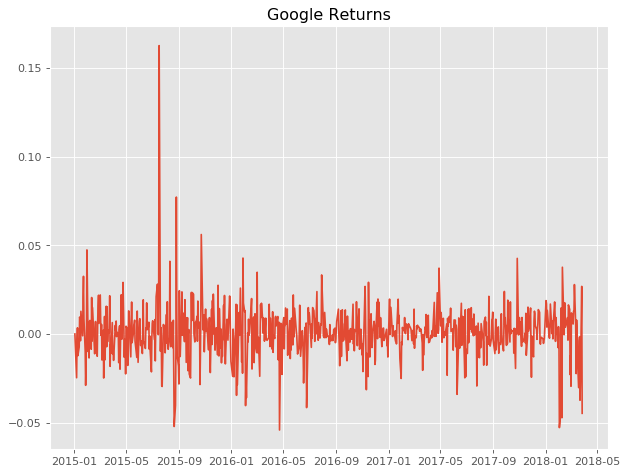

In [73]:
# set parameters
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

# plot google returns
plt.plot(daily_pct_change['Adj. Close'])
plt.title('Google Returns')

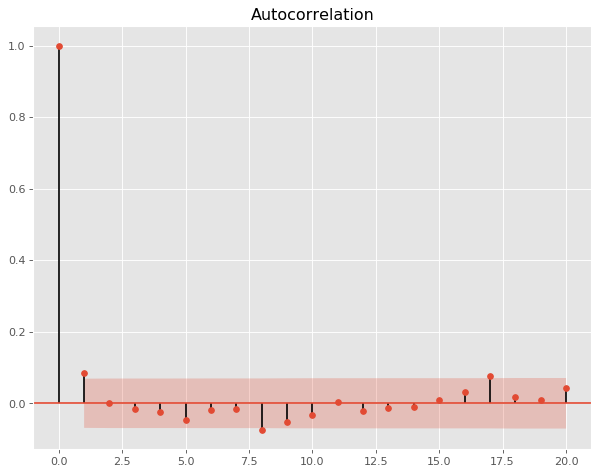

In [74]:
# set parameters
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

# original Series
plot_acf(daily_pct_change['Adj. Close'], alpha = 0.05, lags = 20);

It can be seen here that the returns exhibit a flat behaviour and the autocorrelation plot seems to indicate that the returns are not correlated with their lags.

### What are the "right" parameters for the ARIMA model?

There are three techniques to determine the "right" order:
* Partial Autocorrelation Function (PACF)

It sort of eliminates the influence from the intermediate lags.

* Information Criteria

AIC or BIC.

* Grid Search

Normally, any autocorrelation in a stationarized series can be rectified by adding AR terms.

#### PACF

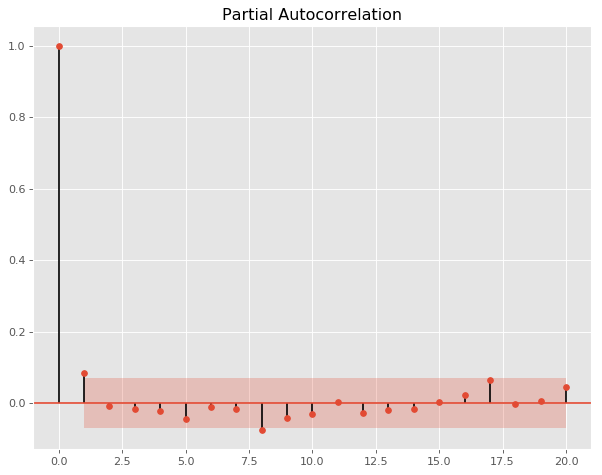

In [75]:
# plot PACF
plot_pacf(daily_pct_change, lags = 20);

Here it seems to suggest we should use only one lag (only one is significant). 

#### Information Criterion (BIC)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

Text(0.5, 0, 'Order of AR')

Text(0, 0.5, 'Bayesian Information Criterion')

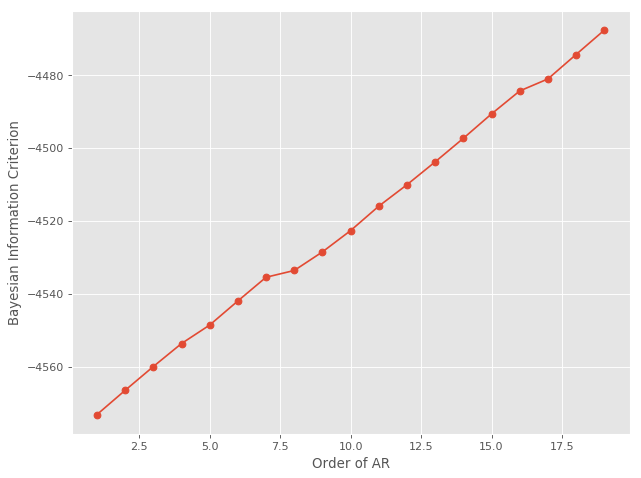

In [79]:
# create a vector of zeros
BIC = np.zeros(20)

# produce model with 20 different orders and store BICs
for p in range(20):
    mod = ARIMA(daily_pct_change, order = (p, 0, 0))
    res = mod.fit()
    
    # store BIC result
    BIC[p] = res.bic

# plot BICs
plt.plot(range(1,20), BIC[1:20], marker = 'o')

# xlabel
plt.xlabel('Order of AR')

# ylabel
plt.ylabel('Bayesian Information Criterion')

# show
plt.show()

Same conclusion using BIC.

#### Grid Search

In [ ]:
in progress